In [ ]:
# machine learning practice project to understand a user's taste in movies and recommend movies accordingly.This recommendation system is based on collaborative filtering that allows you to explore your taste based on what other similar users liked as well.

In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download shubhammehta21/movie-lens-small-latest-dataset

  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 32.7MB/s]


In [3]:
! unzip movie-lens-small-latest-dataset.zip

Archive:  movie-lens-small-latest-dataset.zip
  inflating: README.txt              
  inflating: links.csv               
  inflating: movies.csv              
  inflating: ratings.csv             
  inflating: tags.csv                


In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
user_ratings_df = pd.read_csv('/content/ratings.csv')

In [6]:
user_ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(user_ratings_df,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)

(70585, 4)
(30251, 4)


In [8]:
user_data = X_train.pivot(index='userId', columns = 'movieId', values = 'rating').fillna(0)
user_data.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
user_data.shape

(610, 8566)

In [10]:
dummy_train = X_train.copy()
dummy_test = X_test.copy()

dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x > 0 else 1)
dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x > 0 else 0)


In [11]:
dummy_train = dummy_train.pivot(index='userId', columns='movieId', values='rating').fillna(1)

dummy_test = dummy_test.pivot(index='userId', columns='movieId', values='rating').fillna(0)

In [12]:
dummy_train.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
dummy_test.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,187595,189043,189111,189333,189547,189713,190213,190219,193567,193587
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# user-user cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(user_data)
user_similarity[np.isnan(user_similarity)] = 0


In [15]:
user_similarity_df = pd.DataFrame(user_similarity)
print(user_similarity.shape)

(610, 610)


In [16]:
user_similarity

array([[1.        , 0.01799262, 0.02914591, ..., 0.22586534, 0.12184689,
        0.13241346],
       [0.01799262, 1.        , 0.        , ..., 0.04299081, 0.03472882,
        0.0625667 ],
       [0.02914591, 0.        , 1.        , ..., 0.00378273, 0.        ,
        0.02382229],
       ...,
       [0.22586534, 0.04299081, 0.00378273, ..., 1.        , 0.10982639,
        0.21962266],
       [0.12184689, 0.03472882, 0.        , ..., 0.10982639, 1.        ,
        0.05416081],
       [0.13241346, 0.0625667 , 0.02382229, ..., 0.21962266, 0.05416081,
        1.        ]])

In [17]:
user_similarity_df

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
0,1.000000,0.017993,0.029146,0.148754,0.122258,0.108768,0.103888,0.128239,0.051438,0.014607,...,0.067951,0.153384,0.179664,0.032427,0.158198,0.130485,0.147355,0.225865,0.121847,0.132413
1,0.017993,1.000000,0.000000,0.005328,0.000000,0.014868,0.000000,0.038174,0.000000,0.057117,...,0.189598,0.022244,0.016182,0.000000,0.000000,0.022254,0.000000,0.042991,0.034729,0.062567
2,0.029146,0.000000,1.000000,0.000000,0.000000,0.003441,0.000000,0.000000,0.000000,0.000000,...,0.003388,0.006863,0.000000,0.000000,0.015378,0.010645,0.005605,0.003783,0.000000,0.023822
3,0.148754,0.005328,0.000000,1.000000,0.138665,0.067462,0.080088,0.055515,0.000000,0.011035,...,0.071540,0.082813,0.182836,0.058968,0.071238,0.139829,0.069749,0.076736,0.030303,0.066570
4,0.122258,0.000000,0.000000,0.138665,1.000000,0.220667,0.069357,0.366327,0.000000,0.007295,...,0.026180,0.322180,0.086314,0.136743,0.131275,0.075583,0.031402,0.082719,0.230286,0.045814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,0.130485,0.022254,0.010645,0.139829,0.075583,0.089459,0.105211,0.060393,0.058806,0.050838,...,0.120263,0.082748,0.213553,0.062573,0.114701,1.000000,0.108419,0.200877,0.064702,0.137585
606,0.147355,0.000000,0.005605,0.069749,0.031402,0.100864,0.183396,0.082914,0.015739,0.012746,...,0.027771,0.100601,0.136116,0.095247,0.068073,0.108419,1.000000,0.170276,0.042624,0.077084
607,0.225865,0.042991,0.003783,0.076736,0.082719,0.124669,0.196629,0.131835,0.083834,0.040598,...,0.133432,0.124879,0.163555,0.091700,0.128169,0.200877,0.170276,1.000000,0.109826,0.219623
608,0.121847,0.034729,0.000000,0.030303,0.230286,0.182878,0.058977,0.472248,0.000000,0.031327,...,0.031228,0.314719,0.048554,0.123281,0.083694,0.064702,0.042624,0.109826,1.000000,0.054161


In [18]:
user_predicted_ratings = np.dot(user_similarity,user_data)
user_predicted_ratings

array([[8.52008912e+01, 3.99290227e+01, 2.08165173e+01, ...,
        2.81820351e-02, 2.81820351e-02, 1.57425084e-01],
       [2.45531356e+01, 1.05987273e+01, 2.94172315e+00, ...,
        8.74389309e-02, 8.74389309e-02, 4.49741734e-01],
       [4.22670774e+00, 2.11463396e+00, 9.59320674e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.49265311e+01, 4.92867089e+01, 2.12555470e+01, ...,
        2.51644930e-02, 2.51644930e-02, 5.92666313e-01],
       [7.50962548e+01, 3.56578151e+01, 1.17138113e+01, ...,
        0.00000000e+00, 0.00000000e+00, 6.43083908e-02],
       [7.67153155e+01, 3.67625117e+01, 1.11564580e+01, ...,
        2.61466866e-01, 2.61466866e-01, 8.03583319e-01]])

In [19]:
user_final_ratings = np.multiply(user_predicted_ratings,dummy_train)
user_final_ratings.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,190221,191005,193565,193571,193573,193579,193581,193583,193585,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,39.929023,0.000000,1.220732,10.483532,0.000000,14.082187,2.605186,4.111435,47.981999,...,0.083324,0.036234,0.028182,0.032208,0.032208,0.028182,0.032208,0.028182,0.028182,0.157425
2,24.553136,10.598727,2.941723,0.085473,2.773060,10.458197,2.308815,0.523106,0.588578,11.698251,...,0.054182,0.112421,0.087439,0.099930,0.099930,0.087439,0.099930,0.087439,0.087439,0.449742
3,4.226708,2.114634,0.959321,0.066644,0.308448,2.855740,0.518991,0.105484,0.190006,2.550762,...,0.008707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,50.832807,23.786786,9.793001,0.706291,6.609481,24.594138,10.881808,1.505819,2.196956,27.970658,...,0.005910,0.065396,0.050864,0.058130,0.058130,0.050864,0.058130,0.050864,0.050864,0.106328
5,60.794262,36.875980,12.358414,2.321889,13.215004,29.323176,14.149193,3.043103,2.351687,47.983608,...,0.108995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103332


In [20]:
user_final_ratings.iloc[42].sort_values(ascending = False)[0:5]

movieId
480    87.452973
150    86.994790
457    81.930003
593    80.807548
1      61.416804
Name: 43, dtype: float64

Movie recommendation using KNN

In [51]:
df_movies = pd.read_csv('/content/movies.csv', usecols=['movieId','title'], dtype={'movieId': 'int32', 'title':'str'})

In [91]:
df_movies['title'] = df_movies['title'].str.replace(r'\s\(\d{4}\)', '')

<ipython-input-91-597c181289ad>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movies['title'] = df_movies['title'].str.replace(r'\s\(\d{4}\)', '')


In [92]:
df_movies.head()

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II


In [93]:
df_ratings = pd.read_csv('/content/ratings.csv', usecols=['userId','movieId','rating'], dtype={'userId': 'int32','movieId': 'int32', 'rating':'float32'})

In [94]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int32 
 1   title    9742 non-null   object
dtypes: int32(1), object(1)
memory usage: 114.3+ KB


In [95]:
df_ratings.info()
df_ratings.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int32  
 1   movieId  100836 non-null  int32  
 2   rating   100836 non-null  float32
dtypes: float32(1), int32(2)
memory usage: 1.2 MB


,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [96]:
df_ratings.shape

(100836, 3)

In [97]:
num_users = len(df_ratings['userId'].unique())
num_items = len(df_ratings['movieId'].unique())

In [98]:
# get the count of each rating
df_ratings_cnt_tmp = pd.DataFrame(df_ratings.groupby('rating').size(),columns=['count'])
df_ratings_cnt_tmp

,count
rating,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [99]:
# add the 0 rated movies to this count
total_cnt = num_users * num_items
rating_zero_cnt = total_cnt - df_ratings.shape[0]
df_ratings_cnt = df_ratings_cnt_tmp.append(pd.DataFrame({'count': rating_zero_cnt}, index = [0.0]), verify_integrity=True).sort_index()
df_ratings_cnt

<ipython-input-99-1d26f69b1b00>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ratings_cnt = df_ratings_cnt_tmp.append(pd.DataFrame({'count': rating_zero_cnt}, index = [0.0]), verify_integrity=True).sort_index()


,count
0.0,5830804
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [100]:
df_ratings_cnt['log_count'] = np.log(df_ratings_cnt['count'])
df_ratings_cnt

,count,log_count
0.0,5830804,15.578665
0.5,1370,7.222566
1.0,2811,7.941296
1.5,1791,7.490529
2.0,7551,8.929435
2.5,5550,8.621553
3.0,20047,9.905835
3.5,13136,9.483112
4.0,26818,10.196829
4.5,8551,9.053804


Text(0, 0.5, 'number of ratings')

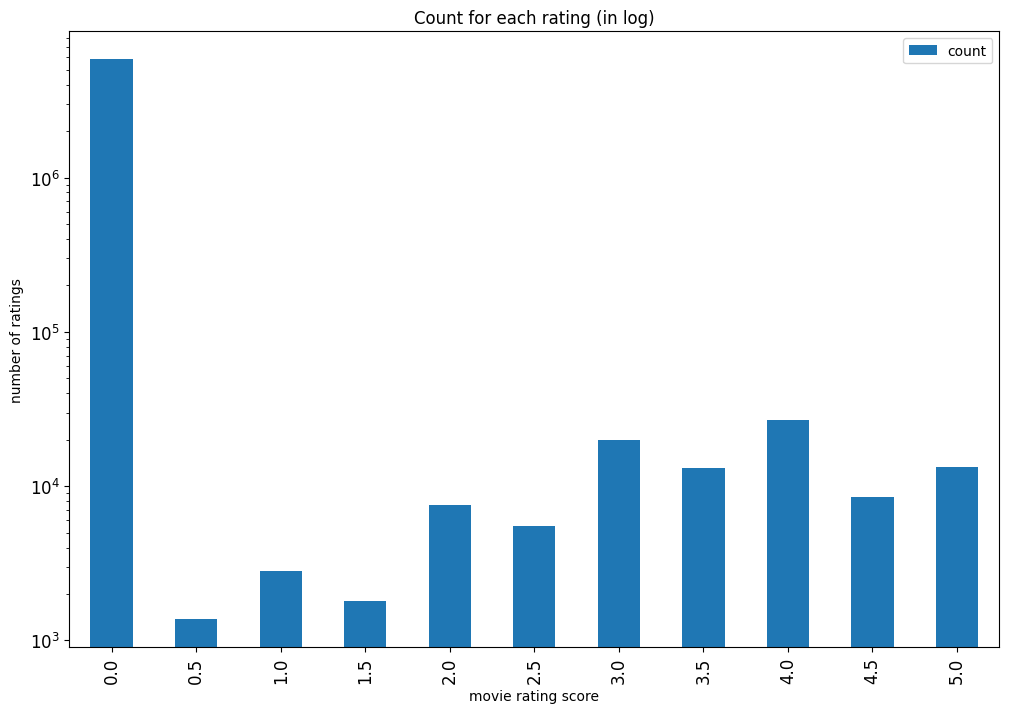

In [101]:
ax = df_ratings_cnt[['count']].reset_index().rename(columns={'index':'rating score'}).plot(x='rating score', y='count', kind='bar',figsize=(12,8), title='Count for each rating (in log)', logy=True, fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [102]:
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [103]:
df_movies_cnt = pd.DataFrame(df_ratings.groupby('movieId').size(), columns=['count'])
df_movies_cnt

,count
movieId,
1,215
2,110
3,52
4,7
5,49
...,...
193581,1
193583,1
193585,1


Text(0, 0.5, 'number of ratings')

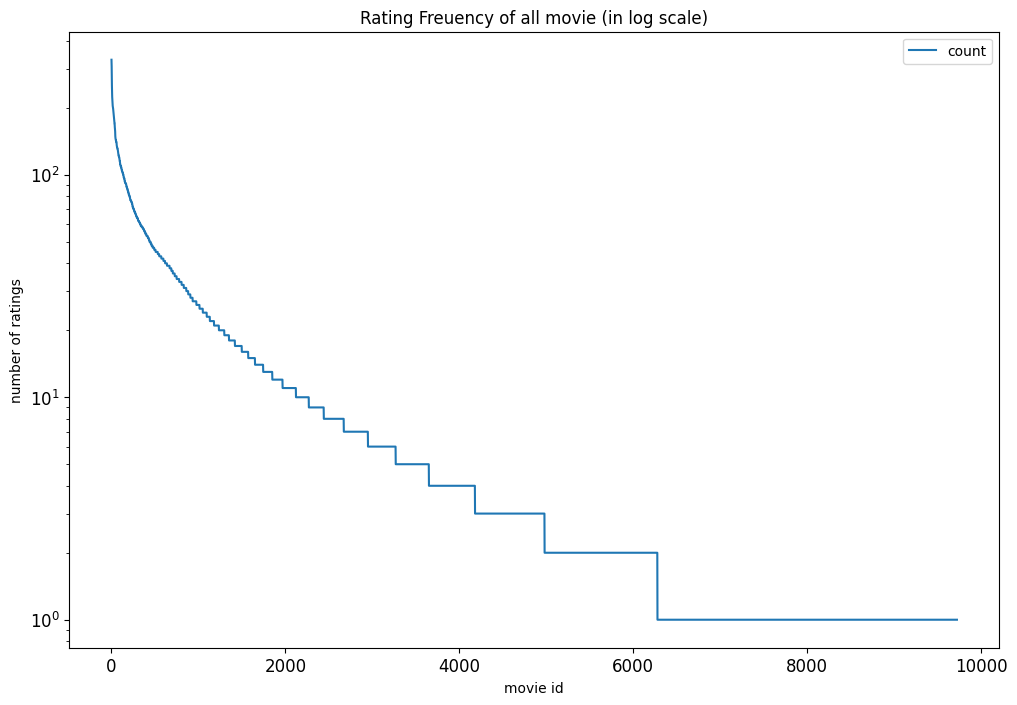

In [104]:
ax = df_movies_cnt.sort_values('count', ascending=False).reset_index(drop=True).plot(figsize=(12,8),title='Rating Freuency of all movie (in log scale)', fontsize=12,logy=True)

ax.set_xlabel("movie id")
ax.set_ylabel("number of ratings")

In [105]:
df_movies_cnt['count'].quantile(np.arange(1,0.6,-0.05))

1.00    329.0
0.95     47.0
0.90     27.0
0.85     17.0
0.80     12.0
0.75      9.0
0.70      7.0
0.65      5.0
Name: count, dtype: float64

In [106]:
popularity_thres = 50
popular_movies = list(set((df_movies_cnt.query('count >= @popularity_thres').index)))
df_ratings_after_drop_movies = df_ratings[df_ratings.movieId.isin(popular_movies)]
print("Before dropping movies", df_ratings.shape)
print("After dropping movies below threshold i.e, dropping unpopular movies", df_ratings_after_drop_movies.shape)

Before dropping movies (100836, 3)
After dropping movies below threshold i.e, dropping unpopular movies (41360, 3)


In [107]:
df_users_cnt = pd.DataFrame(df_ratings.groupby('userId').size(), columns=['count'])
df_users_cnt

,count
userId,
1,232
2,29
3,39
4,216
5,44
...,...
606,1115
607,187
608,831


In [108]:
df_users_cnt_sorted = df_users_cnt.sort_values(by='count', ascending=False)
df_users_cnt_sorted.head()

,count
userId,
414,2698
599,2478
474,2108
448,1864
274,1346


Text(0, 0.5, 'number of ratings')

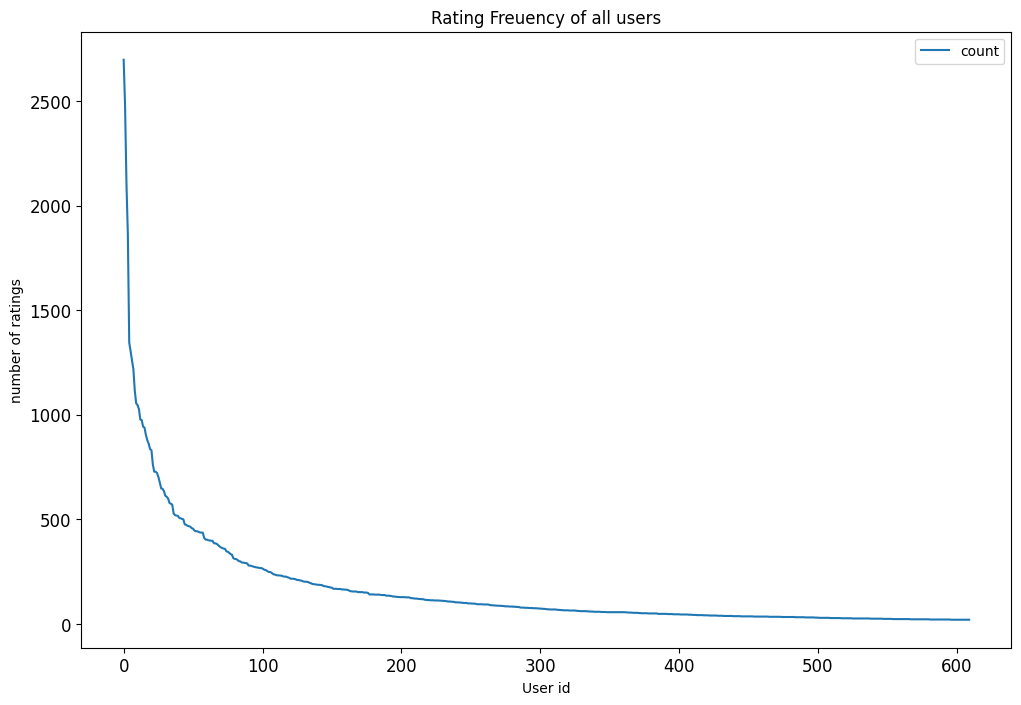

In [109]:
ax = df_users_cnt.sort_values('count', ascending=False).reset_index(drop=True).plot(figsize=(12,8),title='Rating Freuency of all users', fontsize=12)

ax.set_xlabel("User id")
ax.set_ylabel("number of ratings")

In [110]:
rating_thres = 50
active_users = list(set((df_users_cnt.query('count >= @rating_thres').index)))
df_ratings_after_drop_users = df_ratings[df_ratings.userId.isin(active_users)]
print("Before dropping movies", df_ratings.shape)
print("After dropping movies below threshold i.e, dropping unpopular movies", df_ratings_after_drop_users.shape)

Before dropping movies (100836, 3)
After dropping movies below threshold i.e, dropping unpopular movies (93812, 3)


KNN model

In [111]:
from scipy.sparse import csr_matrix

In [112]:
!pip install fuzzywuzzy

In [113]:
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz

import seaborn as sns

%matplotlib inline

In [114]:
movie_user_mat = df_ratings_after_drop_users.pivot(index='movieId',columns='userId', values='rating').fillna(0)
movie_to_idx = { movie: i for i, movie in enumerate(list(df_movies.set_index('movieId').loc[movie_user_mat.index].title))}
movie_user_mat_sparse = csr_matrix(movie_user_mat.values)

In [115]:
%env JOBLIB_TEMP_FOLDER=/tmp

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model_knn.fit(movie_user_mat_sparse)

env: JOBLIB_TEMP_FOLDER=/tmp


NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [137]:
def fuzzy_matching(mapper, fav_movie, verbose=True):
  match_tuple = []
  print(mapper)
  for title,idx in mapper.items():
    ratio = fuzz.ratio(title.lower(), fav_movie.lower())
    # print(ratio)
    if ratio >=60:
      match_tuple.append((title,idx,ratio))

  match_tuple = sorted(match_tuple, key=lambda x:x[2])[::-1]
  if not match_tuple:
    print("no match found")
    return None
  if verbose:
    print('Found possible matches {0}\n'.format(x[0] for x in match_tuple))
  return match_tuple[0][1]

In [155]:
def make_recommendations(model_knn,data,mapper,fav_movie,n_recommendations):
  model_knn.fit(data)
  print('Your input movie', fav_movie)
  idx = fuzzy_matching(mapper,fav_movie,verbose=True)
  if idx is None:
    print('Invalid movie. No recommendations available.')
    return None
  print('Recommendation system')
  distances, indices = model_knn.kneighbors(data[idx, :],n_neighbors=n_recommendations+1)
  raw_recommends = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
  reverse_mapper = {v: k for k,v in mapper.items()}
  print(f'recommendations for {fav_movie}')
  for i, (idx,dist) in enumerate(raw_recommends):
    if idx in reverse_mapper:
      print('{0}: {1} with distance {2}'.format(i+1, reverse_mapper[idx], dist))


In [118]:
def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    """
    return top n similar movie recommendations based on user's input movie


    Parameters
    ----------
    model_knn: sklearn model, knn model

    data: movie-user matrix

    mapper: dict, map movie title name to index of the movie in data

    fav_movie: str, name of user input movie

    n_recommendations: int, top n recommendations

    Return
    ------
    list of top n similar movie recommendations
    """
    # fit
    model_knn.fit(data)
    # get input movie index
    print('You have input movie:', fav_movie)
    idx = fuzzy_matching(mapper, fav_movie, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    print('--',data)
    distances, indices = model_knn.kneighbors(data.getrow(idx), n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_movie))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [159]:
my_fave = 'Die Hard 2'

make_recommendations(model_knn=model_knn,data=movie_user_mat_sparse,fav_movie=my_fave,mapper=movie_to_idx,n_recommendations=10)

Your input movie Die Hard 2
{'Toy Story': 0, 'Jumanji': 1, 'Grumpier Old Men': 2, 'Waiting to Exhale': 3, 'Father of the Bride Part II': 4, 'Heat': 5, 'Sabrina': 691, 'Tom and Huck': 7, 'Sudden Death': 8, 'GoldenEye': 9, 'American President, The': 10, 'Dracula: Dead and Loving It': 11, 'Balto': 12, 'Nixon': 13, 'Cutthroat Island': 14, 'Casino': 15, 'Sense and Sensibility': 16, 'Four Rooms': 17, 'Ace Ventura: When Nature Calls': 18, 'Money Train': 19, 'Get Shorty': 20, 'Copycat': 21, 'Assassins': 22, 'Powder': 23, 'Leaving Las Vegas': 24, 'Othello': 25, 'Now and Then': 26, 'Persuasion': 7185, 'City of Lost Children, The (Cité des enfants perdus, La)': 28, 'Shanghai Triad (Yao a yao yao dao waipo qiao)': 29, 'Dangerous Minds': 30, 'Twelve Monkeys (a.k.a. 12 Monkeys)': 31, 'Babe': 32, 'Dead Man Walking': 33, 'It Takes Two': 34, 'Clueless': 35, 'Richard III': 36, 'Dead Presidents': 37, 'Restoration': 38, 'Mortal Kombat': 39, 'To Die For': 40, 'How to Make an American Quilt': 41, 'Seven (a.

In [142]:
reverse_mapper[509]

NameError: ignored

In [ ]:
movie_metadata_df = pd.read_csv('/content/movies_metadata.csv')
movie_metadata_df = movie_metadata_df[['title','genres']]
movie_metadata_df.head()

In [ ]:
movies_data = user_ratings_df.merge(movie_metadata_df, on='movieID')